In [ ]:
!pip install transformers sentence-transformers numpy scikit-learn pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import os

# Initialize the BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

def generate_caption(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(image, return_tensors="pt")
    output = model.generate(**inputs)
    caption = processor.decode(output[0], skip_special_tokens=True)
    return caption

# Generate captions for images in a folder
def caption_images(folder_path):
    image_captions = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith((".png", ".jpg", ".jpeg")):
            image_path = os.path.join(folder_path, filename)
            caption = generate_caption(image_path)
            image_captions.append({"image": image_path, "caption": caption})
            print(f"Caption for {filename}: {caption}")
    return image_captions

image_captions = caption_images("/content/Image_set")


Caption for Abinash_sonali_9.jpg: a man sitting at a table with a plate of food
Caption for Abinash_sonali_8.jpg: a man and woman standing in front of a door
Caption for Abinash_sonali_10.jpg: a man sitting at a table with a plate of food
Caption for Abinash_sonali_6.jpg: a man and a woman sitting next to each other people
Caption for Abinash_sonali_1.jpg: a man and woman sitting on a couch
Caption for Abinash_sonali_5.jpg: a man and woman standing in front of a door
Caption for Abinash_sonali_7.jpg: a woman in a colorful dress dancing at a festival
Caption for Abinash_sonali_4.jpg: a woman in a pink dress posing for the camera
Caption for Abinash_sonali_2.jpg: a man with a beard sitting in a chair
Caption for Abinash_sonali_3.jpg: a man with a beard and a shirt


In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for image captions
for item in image_captions:
    item["embedding"] = model.encode(item["caption"])

# Function to find the most relevant image
def find_most_relevant_image(prompt, image_captions):
    prompt_embedding = model.encode(prompt)
    similarities = [
        cosine_similarity(
            [prompt_embedding], [item["embedding"]]
        )[0][0]
        for item in image_captions
    ]
    best_match_index = np.argmax(similarities)
    return image_captions[best_match_index]


In [ ]:
# User's prompt
user_prompt = "Me in shirt"

# Find the most relevant image
best_match = find_most_relevant_image(user_prompt, image_captions)

# Display the result
print(f"Best match for the prompt '{user_prompt}':")
print(f"Image Path: {best_match['image']}")
print(f"Caption: {best_match['caption']}")


Best match for the prompt 'Me in shirt':
Image Path: /content/Image_set/Abinash_sonali_3.jpg
Caption: a man with a beard and a shirt


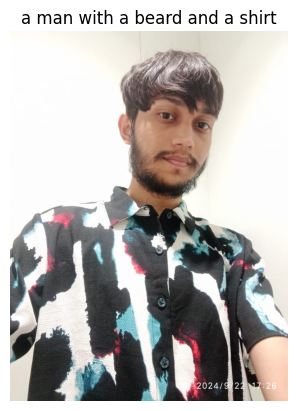

In [ ]:
import matplotlib.pyplot as plt

def display_image(image_path, caption):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis("off")
    plt.title(caption)
    plt.show()

# Display the matched image
display_image(best_match["image"], best_match["caption"])
